In [87]:
library(metacell)
library(GEOquery)
library(googlesheets4)
library(googledrive)
library(devtools)
library(reshape2)
library(plyr)
library(dplyr)
library(tibble)
library(ggplot2)
library(tidyverse)
library(tgstat)
library(tgconfig)
library(gridExtra)
library(SingleCellExperiment)
library(babelgene)
library(zellkonverter)
library(liana)
library(ComplexHeatmap)
library(grid)
library(GOfuncR)
library(cowplot)
library(tidyr)
library(rstatix)

# Initializing DBs

In [2]:
if(!dir.exists("scdb")) dir.create("scdb/")
scdb_init("scdb/", force_reinit=T)
#> initializing scdb to testdb/

initializing scdb to scdb/



In [3]:
if(!dir.exists("neutrophil_singlet_figs")) dir.create("neutrophil_singlet_figs/")
scfigs_init("neutrophil_singlet_figs/")

In [4]:
mc = scdb_mc("neutrophil_mc")
mat = scdb_mat("neutrophil_singlets")

In [21]:
bad_genes = readr::read_lines('annotations/neutrophil_filtered_genes.txt')

In [28]:
length(mc@cell_names)

[1] 1759

In [30]:
type_colors = c("chartreuse", "magenta")
names(type_colors) = c('LY6G', 'CD45+')

In [31]:
age_colors = RColorBrewer::brewer.pal(9, "BuPu")[3:8]
names(age_colors) = age_order = c('10d', '3w', '6w', '8w', '10w', '12w')

In [32]:
mat@cell_metadata$Replicate = with(mat@cell_metadata, ifelse(Seq.Batch.ID == "SB015" & Batch.Set.ID == "sandra-10w-5", 
                                                             '6', as.character(Replicate)))

In [33]:
mat@cell_metadata %>%
    filter(Age == "10w", condition == "normal")

,Amp.Batch.ID,Well_position,Seq.Batch.ID,Date of sequencing,Batch.Set.ID,Owner,Date of sort,"Plate ID (15 characters, no _/+)",Plate description,Empty_well,⋯,outlier,pre_cell_directs,cell_directs,pre_pile,pile,pre_candidate,pre_cell_deviant_votes,pre_dissolved,pre_metacell,amp_batch_id
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<lgl>,⋯,<lgl>,<int>,<int>,<int>,<int>,<int>,<int>,<lgl>,<int>,<dbl>
AB1295_E22,AB1295,E22,SB015,18/06/2024,sandra-10w-5,Sandra,05/06/2024,,10wCD45+Ly6g+N3,FALSE,⋯,FALSE,0,0,-1,0,-1,0,FALSE,-1,1
AB1295_I4,AB1295,I4,SB015,18/06/2024,sandra-10w-5,Sandra,05/06/2024,,10wCD45+Ly6g+N3,FALSE,⋯,FALSE,0,0,-1,0,-1,0,FALSE,-1,1
AB1295_A7,AB1295,A7,SB015,18/06/2024,sandra-10w-5,Sandra,05/06/2024,,10wCD45+Ly6g+N3,FALSE,⋯,FALSE,0,0,-1,0,-1,0,FALSE,-1,1
AB1295_C7,AB1295,C7,SB015,18/06/2024,sandra-10w-5,Sandra,05/06/2024,,10wCD45+Ly6g+N3,FALSE,⋯,FALSE,0,0,-1,0,-1,0,FALSE,-1,1
AB1295_C6,AB1295,C6,SB015,18/06/2024,sandra-10w-5,Sandra,05/06/2024,,10wCD45+Ly6g+N3,FALSE,⋯,FALSE,0,0,-1,0,-1,0,FALSE,-1,1
AB1295_K18,AB1295,K18,SB015,18/06/2024,sandra-10w-5,Sandra,05/06/2024,,10wCD45+Ly6g+N3,FALSE,⋯,FALSE,0,0,-1,0,-1,0,FALSE,-1,1
AB1295_A3,AB1295,A3,SB015,18/06/2024,sandra-10w-5,Sandra,05/06/2024,,10wCD45+Ly6g+N3,FALSE,⋯,FALSE,0,0,-1,0,-1,0,FALSE,-1,1
AB1295_K13,AB1295,K13,SB015,18/06/2024,sandra-10w-5,Sandra,05/06/2024,,10wCD45+Ly6g+N3,FALSE,⋯,FALSE,0,0,-1,0,-1,0,FALSE,-1,1
AB1295_G24,AB1295,G24,SB015,18/06/2024,sandra-10w-5,Sandra,05/06/2024,,10wCD45+Ly6g+N3,FALSE,⋯,FALSE,0,0,-1,0,-1,0,FALSE,-1,1


In [34]:
mat@cell_metadata$Batch.Set.ID = with(mat@cell_metadata, ifelse(Seq.Batch.ID == "SB015" & Batch.Set.ID == "sandra-10w-5", 
                                                                'sandra-10w-6', as.character(Batch.Set.ID)))

In [37]:
mat@cell_metadata$group = factor(mat@cell_metadata$group, levels=c("Developmental", "Healthy Adulthood", 
                                                                   "Early Carcinoma", "Advanced Carcinoma"))

In [38]:
mat@cell_metadata$group %>% table

.
     Developmental  Healthy Adulthood    Early Carcinoma Advanced Carcinoma 
               211                119                488                941 

In [39]:
stage_colors = c("#ffd2f2", "#d0a6d0", "#714d8c", "#42216a")
names(stage_colors) = stage_order = levels(mat@cell_metadata$group)

In [44]:
cond_colors= c('#f57451', '#2996a0')
names(cond_colors) = c('tumor', 'normal')

# Visulations etc

In [51]:
annot_df <- read.csv("annotations/neutrophil_annots.csv", sep=",")

In [45]:
mcell_mc_add_annot("neutrophil_mc", annot_df$label)
mcell_mc_add_color("neutrophil_mc", annot_df$color)

In [45]:
mat = scdb_mat("neutrophil_singlets")
mc = scdb_mc("neutrophil_mc")

In [46]:
mat@cell_metadata$group = factor(mat@cell_metadata$group, levels=c("Developmental", "Healthy Adulthood", 
                                                                   "Early Carcinoma", "Advanced Carcinoma"))

In [47]:
mat@cell_metadata$Replicate = with(mat@cell_metadata, ifelse(Seq.Batch.ID == "SB015" & Batch.Set.ID == "sandra-10w-5" & condition == 'tumor', 
                                                             '6', as.character(Replicate)))

In [49]:
mat@cell_metadata$Batch.Set.ID = with(mat@cell_metadata, ifelse(Seq.Batch.ID == "SB015" & Batch.Set.ID == "sandra-10w-5" & condition == 'tumor', 
                                                                'sandra-10w-6', as.character(Batch.Set.ID)))

In [52]:
for (i in 1:length(unique(annot_df$label))){
    message(paste(i, unique(annot_df$label)[i], sep=": "))
}

1: Cystatin neut

2: MHCII neut

3: Neut Ptgs2+

4: Young TAN

5: Young neut

6: TAN2

7: TAN1



In [53]:
order_index = c(5, 1, 2, 3, 4, 7, 6)
cell_order = unique(annot_df$label)[order_index]

In [54]:
good_cellnames = names(mc@mc[mc@annots[mc@mc] %in% cell_order])

In [86]:
mat@cell_metadata[good_cellnames,] %>%
    filter(Cell_type == "LY6G") %>%
    group_by(Age, condition) %>%
    summarise(n_replicates = length(unique(Replicate)), n_plates=length(unique(Amp.Batch.ID)), n_cells=n()) %>%
    mutate(Age = factor(Age, levels=age_order)) %>%
    arrange(Age, condition) %>%
    write_csv("final_figs/supp1/nums_table_neuts.csv")

`summarise()` has grouped output by 'Age'. You can override using the `.groups`
argument.


In [55]:
unique(annot_df$label)[which(!1:length(unique(annot_df$label)) %in% order_index)]

character(0)

In [56]:
cat(cell_order, sep = '", "')

Young neut", "Cystatin neut", "MHCII neut", "Neut Ptgs2+", "Young TAN", "TAN1", "TAN2

In [57]:
png("neutrophil_singlet_figs/legend.png", width = 3600, height = 1800, units = "px", res = 400)
par(family = "Times New Roman")
plot(NULL ,xaxt='n',yaxt='n',bty='n',ylab='',xlab='', xlim=0:1, ylim=0:1)
legend(x="left", ncol = 2,
       legend=unique(annot_df$label)[order_index],
       fill=unique(annot_df$color)[order_index],
       xpd = TRUE)
dev.off()

png 
  2

In [58]:
bad_genes = as.character(read_lines('annotations/neutrophil_filtered_genes.txt'))

In [59]:
rp_markers = grep("Rpl|Rps|Snor|Gm|Ig[h,k,l]v|^mt-|Hist|Hsp|Jun|Rik", colnames(mat@mat), v=T)

In [60]:
m2d = scdb_mc2d("neutrophil_2dproj")

In [61]:
mc_2d = data.frame(x=m2d@sc_x[good_cellnames], 
                   y=m2d@sc_y[good_cellnames], 
                   annotation=factor(mc@annots[mc@mc[good_cellnames]], levels=cell_order))

In [62]:
group.colors = annot_df$color[match(cell_order, annot_df$label)]
names(group.colors) = cell_order

Warning message:
“Removed 6 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 6 rows containing missing values or values outside the scale range
(`geom_bar()`).”


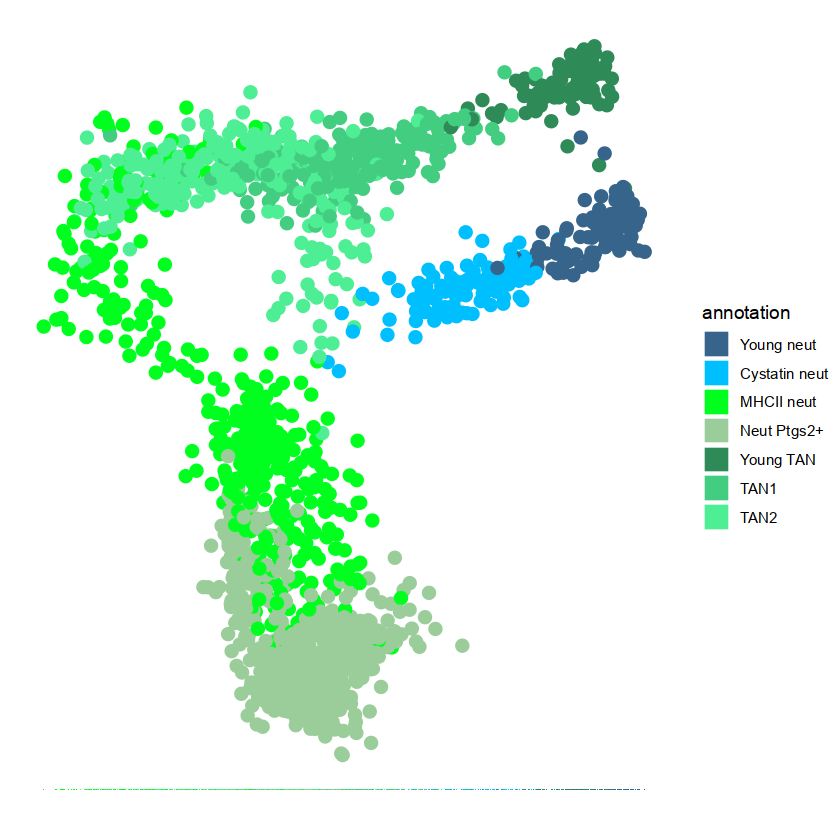

In [63]:
ggplot(mc_2d, aes(x=x, y=y, col=annotation)) +
    geom_point(size=3, show.legend = F) +
    geom_bar(aes(y=0, fill=annotation), stat="identity", color="white") +
    scale_color_manual(values = group.colors[names(group.colors) %in% mc_2d$annotation]) +
    scale_fill_manual(values = group.colors[names(group.colors) %in% mc_2d$annotation]) +
    theme(axis.title.x = element_blank(), axis.title.y = element_blank(), #legend.text=element_blank(), 
    axis.text.x = element_blank(), axis.text.y = element_blank(),
    axis.ticks.x = element_blank(), axis.ticks.y = element_blank(),
    axis.line.x = element_blank(), axis.line.y = element_blank(), )

In [64]:
p = ggplot(mc_2d, aes(x=x, y=y, col=annotation)) +
    geom_point(size=3, show.legend = F) +
    geom_bar(aes(y=0, fill=annotation), stat="identity", color="white") +
    scale_color_manual(values = group.colors[names(group.colors) %in% mc_2d$annotation]) +
    scale_fill_manual(values = group.colors[names(group.colors) %in% mc_2d$annotation]) +
    theme(axis.title.x = element_blank(), axis.title.y = element_blank(), #legend.text=element_blank(), 
    axis.text.x = element_blank(), axis.text.y = element_blank(),
    axis.ticks.x = element_blank(), axis.ticks.y = element_blank(),
    axis.line.x = element_blank(), axis.line.y = element_blank(), )

l = get_legend(p)
p = plot_grid(p + theme(legend.position="none"))

ggsave("neutrophil_singlet_figs/2d_visualization2.png", plot = p, dpi = 1200)
ggsave("neutrophil_singlet_figs/legend2.png", plot=l, dpi = 1200)


Warning message:
“Removed 6 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 6 rows containing missing values or values outside the scale range
(`geom_bar()`).”
Warning message in get_plot_component(plot, "guide-box"):
“Multiple components found; returning the first one. To return all, use `return_all = TRUE`.”
Warning message:
“Removed 6 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 6 rows containing missing values or values outside the scale range
(`geom_bar()`).”
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image


In [65]:
df_2d = data.frame(x=m2d@sc_x[good_cellnames], 
                   y=m2d@sc_y[good_cellnames], 
                   group=factor(mat@cell_metadata[good_cellnames, "group"], levels=names(stage_colors)))

In [66]:
p = ggplot(df_2d, aes(x=x, y=y, col=group)) +
    geom_point(size=3, show.legend = F) +
    geom_bar(aes(y=0, fill=group), stat="identity", color="white") +
    scale_color_manual(values = stage_colors) +
    scale_fill_manual(values = stage_colors) +
    theme(axis.title.x = element_blank(), axis.title.y = element_blank(), #legend.text=element_blank(), 
    axis.text.x = element_blank(), axis.text.y = element_blank(),
    axis.ticks.x = element_blank(), axis.ticks.y = element_blank(),
    axis.line.x = element_blank(), axis.line.y = element_blank(), )

l = get_legend(p)
p = plot_grid(p + theme(legend.position="none"))

ggsave("neutrophil_singlet_figs/2d_stages.png", plot = p, dpi = 1200)
ggsave("neutrophil_singlet_figs/legend_stages.png", plot=l, dpi = 1200)


Warning message:
“Removed 6 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 6 rows containing missing values or values outside the scale range
(`geom_bar()`).”
Warning message in get_plot_component(plot, "guide-box"):
“Multiple components found; returning the first one. To return all, use `return_all = TRUE`.”
Warning message:
“Removed 6 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 6 rows containing missing values or values outside the scale range
(`geom_bar()`).”
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image


In [67]:
all_mat = t(mat@mat[,good_cellnames])
lognorm_mat = log1p(10000 * all_mat / rowSums(all_mat))

In [68]:
gene_names = c("Retnlg", "Csf3r",  "Cxcl2", "Ngp", "Cstdc5", "Wfdc17", "Lrg1", "Trf")

df_2d = data.frame(x=m2d@sc_x[good_cellnames], 
                   y=m2d@sc_y[good_cellnames]) %>% 
    cbind(as.data.frame(as.matrix(lognorm_mat[good_cellnames, gene_names])))

gbs = lapply(gene_names, function(gene_name){

    ggplot(df_2d[order(df_2d[,gene_name], decreasing = F),], aes_string(x='x', y='y', col=gene_name)) +
        geom_point(size=0.5, show.legend = F) +
        scale_color_gradientn(colors=c("ivory2", "orange", "tomato", "mediumorchid4", "midnightblue"), na.value = "midnightblue", 
                              limits=c(0,7)) +
        labs(title = gene_name) +
        theme(plot.title = element_text(size = 12, hjust = 0.5, face = "bold"), 
              axis.title.x = element_blank(), axis.title.y = element_blank(),
              axis.text.x = element_blank(), axis.text.y = element_blank(),
              axis.ticks.x = element_blank(), axis.ticks.y = element_blank(),
              axis.line.x = element_blank(), axis.line.y = element_blank(),
              legend.key.size = unit(0.25, 'cm'), legend.text =  element_text(size = 10))

})

g <- arrangeGrob(grobs=gbs, nrow=2, respect = T) #generates g
ggsave(file="neutrophil_singlet_figs/gene_projections_few.png", g, dpi = 1200) #saves g

Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.”
Warning message:
“Removed 6 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 6 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 6 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 6 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 6 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 6 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 6 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 6 rows

In [69]:
ages = age_order = c("10d", "3w", "6w", "8w", "10w", "12w")
conditions = cond_order = c("tumor", "normal")

In [70]:
full_df = cbind(mat@cell_metadata[names(mc@mc),], annotation=mc@annots[mc@mc])

In [72]:
age_dict = c(10, 3*7, 6*7, 8*7, 10*7, 12*7)
names(age_dict) = age_order

In [73]:
replicate_df = full_df %>%
    #filter(Cell_type == "LY6G") %>%
    group_by(annotation, group, Cell_type, condition, Replicate) %>% 
    summarise(Count=n()) %>%
    as.data.frame %>%
    tidyr::complete(annotation, group, Cell_type, Replicate, condition, fill = list(Count = 0, fraction=0)) %>%
    group_by(group, Cell_type, condition, Replicate) %>% 
    summarise(Replicate=Replicate, 
              group=group,
              condition=condition,
              annotation=annotation, 
              Count=Count, 
              total=sum(Count), 
              fraction = Count / sum(Count)) %>%
    ungroup %>%
    filter(total != 0)

replicate_df$annotation = factor(replicate_df$annotation, levels=cell_order)
replicate_df$group = factor(replicate_df$group, levels=names(stage_colors))

`summarise()` has grouped output by 'annotation', 'group', 'Cell_type',
'condition'. You can override using the `.groups` argument.
Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”
`summarise()` has grouped output by 'group', 'Cell_type', 'condition',
'Replicate'. You can override using the `.groups` argument.


In [74]:
replicate_df_age = full_df %>%
    #filter(Cell_type == "LY6G") %>%
    group_by(annotation, Age, Cell_type, condition, Replicate) %>% 
    summarise(Count=n()) %>%
    as.data.frame %>%
    tidyr::complete(annotation, Age, Cell_type, Replicate, condition, fill = list(Count = 0, fraction=0)) %>%
    group_by(Age, Cell_type, condition, Replicate) %>% 
    summarise(Replicate=Replicate, 
              group=Age,
              condition=condition,
              annotation=annotation, 
              Count=Count, 
              total=sum(Count), 
              fraction = Count / sum(Count)) %>%
    ungroup %>%
    filter(total != 0)

replicate_df_age$annotation = factor(replicate_df_age$annotation, levels=cell_order)
replicate_df_age$Age = factor(replicate_df_age$Age, levels=age_order)

`summarise()` has grouped output by 'annotation', 'Age', 'Cell_type',
'condition'. You can override using the `.groups` argument.
Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”
`summarise()` has grouped output by 'Age', 'Cell_type', 'condition',
'Replicate'. You can override using the `.groups` argument.


In [75]:
replicate_df_age$stage =  factor(with(replicate_df_age, ifelse(Age == "10d", "Development", 
                                                               ifelse(condition == "normal", "Healthy Adulthood",
                                                                      ifelse(Age %in% c('10w', '12w'), "Advanced Carcinoma", 
                                                                             "Early Carcinoma")))),
                                 levels = c("Development", "Healthy Adulthood", "Early Carcinoma", "Advanced Carcinoma"))

In [76]:
sum_df = replicate_df %>%
    group_by(annotation, group) %>% 
    summarise(mean_fraction=mean(fraction), sum_count=sum(Count))

`summarise()` has grouped output by 'annotation'. You can override using the
`.groups` argument.


Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at 0.99”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 2.01”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  7.5046e-17”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 1.0201”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at 0.99”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 2.01”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  7.5046e-17”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singulari

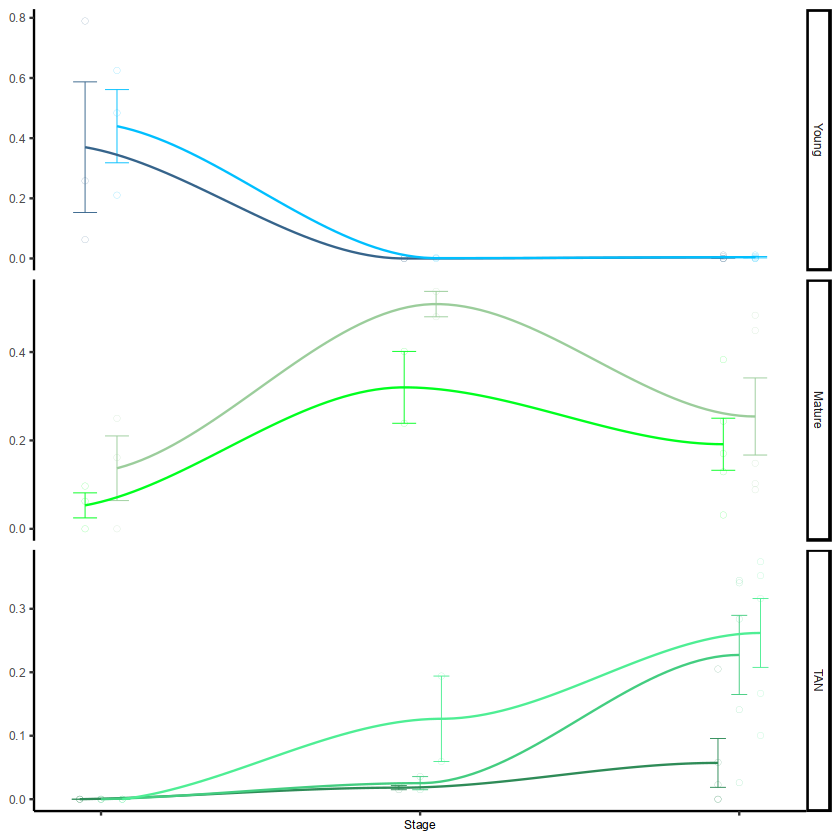

In [183]:
replicate_df_age %>%
    filter(condition == 'tumor') %>%
    mutate(stage = droplevels(stage),
           grouped_cell = factor(ifelse(annotation %in% cell_order[1:2], "Young", 
                                        ifelse(annotation %in% cell_order[3:4], "Mature", "TAN")),
                                 levels=c('Young', 'Mature', 'TAN'))) %>%
    ggplot(aes(x=as.numeric(stage), y=fraction, color=annotation)) +
    scale_x_continuous(name="Stage", breaks = 1:3, labels = levels(replicate_df_age$stage)[c(1,3:4)]) +
    geom_point(size=1.5, shape=21, position = position_dodge(0.2), stroke=0.05, show.legend = F) +
    stat_summary(fun.data="mean_se", geom='errorbar', width=0.15, position = position_dodge(0.2), linewidth=0.2, show.legend=F) +
    geom_smooth(method = 'loess', formula=y~x, se=F, position = position_dodge(0.2), linewidth=0.5, show.legend=F) +
    scale_color_manual(values = group.colors) +
    facet_grid(rows='grouped_cell', scales='free_y') +
    scale_shape_manual(values = c(22, 1, 6, 2)) +
    theme(strip.text = element_text(size=7), plot.title = element_text(size=8, hjust=0.5),
          axis.title.y = element_blank(), axis.title.x =element_text(size=7),
          axis.text.y = element_text(size=7), axis.text.x = element_blank())
ggsave("neutrophil_singlet_figs/all_composition_smoothed.pdf", width=2.7, height=3.7, units = 'in')

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at 9.63”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 60.37”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  7.39e-17”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 804.86”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at 9.63”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 60.37”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  7.39e-17”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singulariti

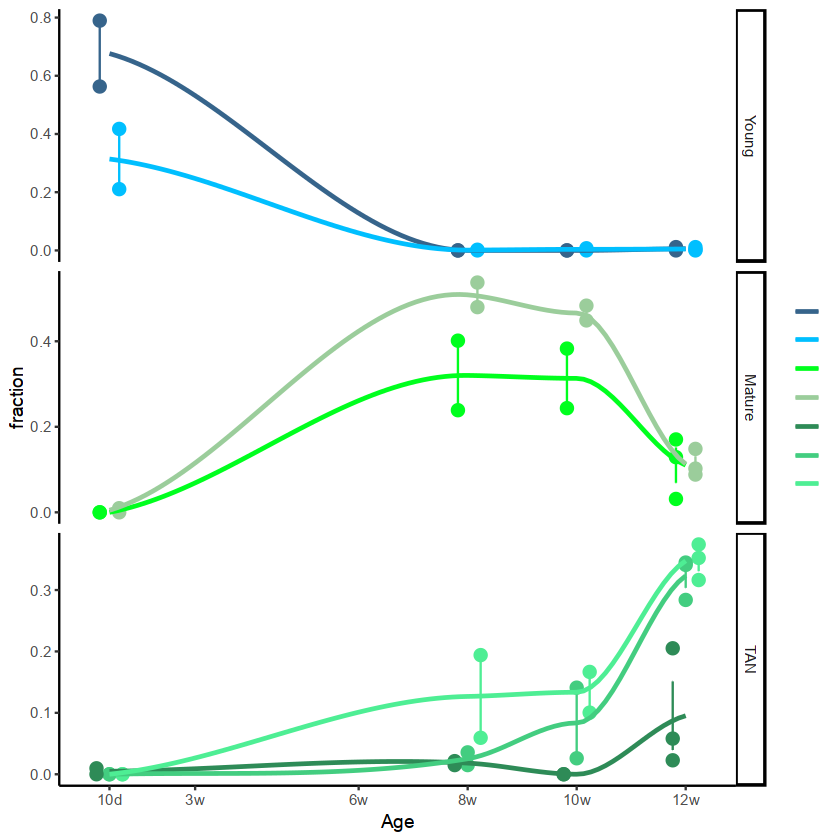

In [82]:
replicate_df_age %>%
    filter(stage != 'Healthy Adulthood', Cell_type == "LY6G") %>%
    mutate(grouped_cell = factor(ifelse(annotation %in% cell_order[1:2], "Young", 
                                        ifelse(annotation %in% cell_order[3:4], "Mature", "TAN")),
                                 levels=c('Young', 'Mature', 'TAN'))) %>%
    ggplot(aes(x=age_dict[Age], y=fraction, color=annotation)) +
    scale_x_continuous(name="Age", breaks = age_dict, labels = names(age_dict)) +
    geom_point(size=3, show.legend = F, position = position_dodge(5)) +
    stat_summary(fun.data="mean_se", geom='errorbar', width=0.1, position = position_dodge(5)) +
    geom_smooth(method = 'loess', formula=y~x, se=F) +
    scale_color_manual(values = group.colors) +
    facet_grid(rows='grouped_cell', scales='free_y') +
    theme(legend.text = element_blank(), legend.title=element_blank())

ggsave("neutrophil_singlet_figs/all_composition_smoothed_age.png", dpi=1200, width=5, height=7)

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at 0.985”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 2.015”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  1.3848e-16”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 4.0602”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at 0.985”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 2.015”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  1.3848e-16”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singu

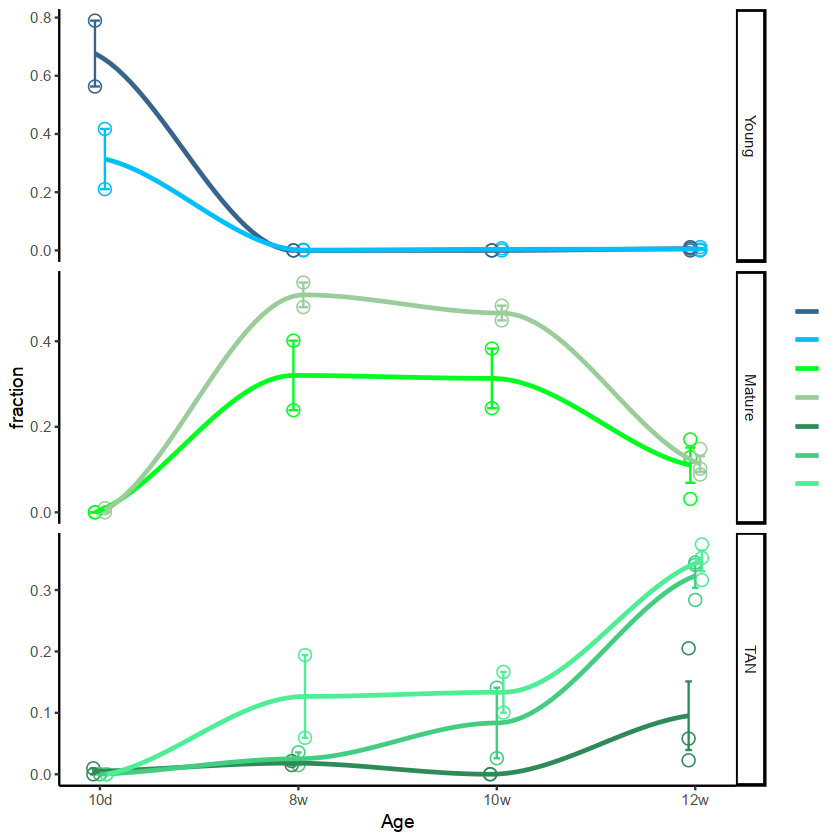

In [84]:
replicate_df_age %>%
    filter(stage != 'Healthy Adulthood', Cell_type == "LY6G") %>%
    mutate(grouped_cell = factor(ifelse(annotation %in% cell_order[1:2], "Young", 
                                        ifelse(annotation %in% cell_order[3:4], "Mature", "TAN")),
                                 levels=c('Young', 'Mature', 'TAN'))) %>%
    mutate(Age=factor(Age, levels=c('10d', '8w', '10w', '12w'))) %>%
    ggplot(aes(x=as.numeric(Age), y=fraction, color=annotation)) +
    scale_x_continuous(name="Age", breaks = 1:4, labels = levels(replicate_df_age$Age)[c(1,4:6)]) +
    geom_point(size=3, show.legend = F, shape=21, position = position_dodge(0.1)) +
    stat_summary(fun.data="mean_se", geom='errorbar', width=0.1, position = position_dodge(0.1)) +
    geom_smooth(method = 'loess', formula=y~x, se=F, position = position_dodge(0.1)) +
    scale_color_manual(values = group.colors) +
    facet_grid(rows='grouped_cell', scales='free_y') +
    theme(legend.text = element_blank(), legend.title=element_blank())

ggsave("neutrophil_singlet_figs/all_composition_smoothed_age.png", dpi=1200, width=5, height=7)

Saving 6.67 x 6.67 in image


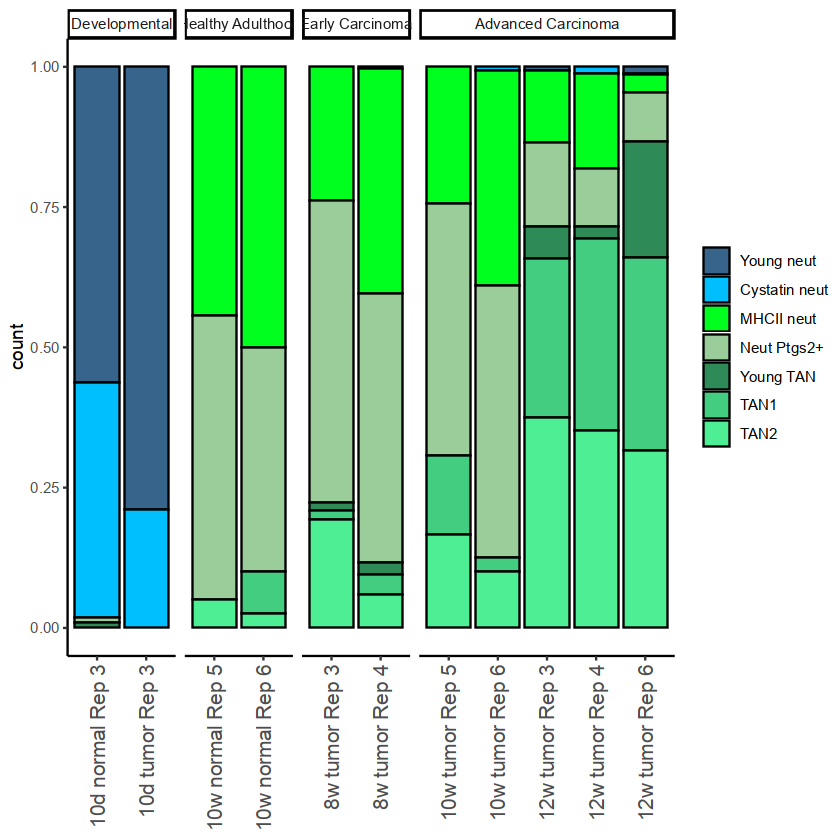

In [89]:
cbind(mat@cell_metadata[names(mc@mc),], annot=mc@annots[mc@mc]) %>%
    filter(Cell_type == "LY6G") %>%
    ggplot(aes(x=paste(Age, condition, 'Rep', Replicate), 
               fill=factor(annot, levels=cell_order), 
               group=factor(annot, levels=cell_order))) +
    geom_bar(stat='count', position='fill', color='black') +
    scale_fill_manual(values = group.colors) +
    facet_grid(~ factor(group, levels=unique(group)[c(4,2,3,1)]), scales = 'free_x', space='free_x') +
    theme(axis.text.x = element_text(angle = 90, hjust=1, vjust=0.5, size=12), axis.title.x = element_blank(), 
          legend.title = element_blank())
ggsave('neutrophil_singlet_figs/composition_bargraphs.pdf')

In [181]:
replicate_df_ly6g = replicate_df %>% 
    filter(group != "Healthy Adulthood") %>%
    mutate(group = droplevels(group))

Saving 6.67 x 6.67 in image


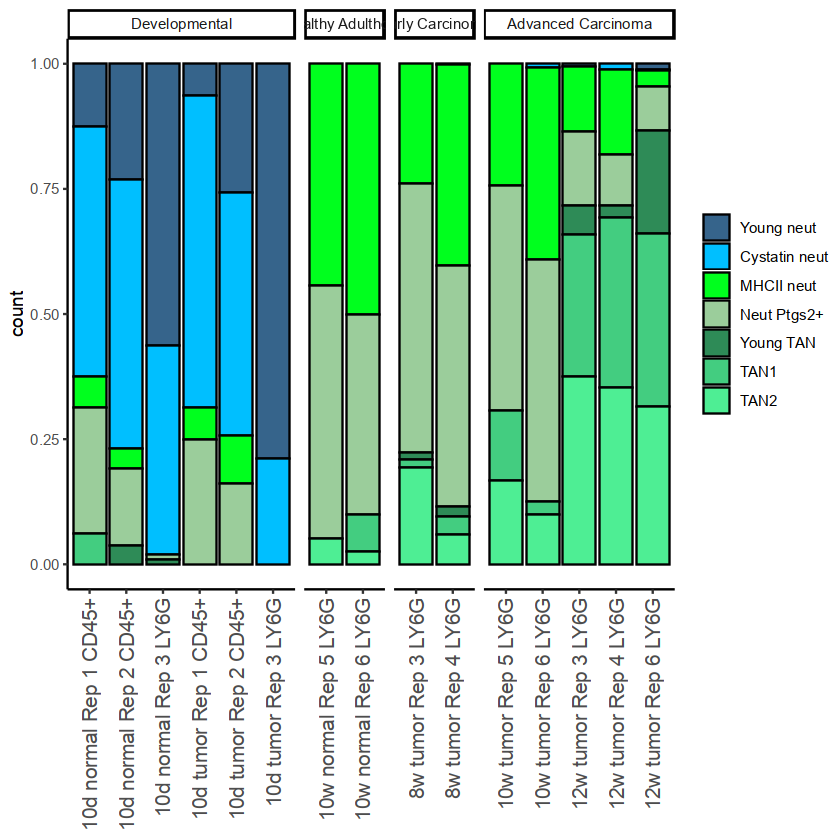

In [88]:
cbind(mat@cell_metadata[names(mc@mc),], annot=mc@annots[mc@mc]) %>%
    #filter(Cell_type == "LY6G") %>%
    ggplot(aes(x=paste(Age, condition, 'Rep', Replicate, Cell_type), 
               fill=factor(annot, levels=cell_order), 
               group=factor(annot, levels=cell_order))) +
    geom_bar(stat='count', position='fill', color='black') +
    scale_fill_manual(values = group.colors) +
    facet_grid(~ factor(group, levels=unique(group)[c(4,2,3,1)]), scales = 'free_x', space='free_x') +
    theme(axis.text.x = element_text(angle = 90, hjust=1, vjust=0.5, size=12), axis.title.x = element_blank(), 
          legend.title = element_blank())
ggsave('neutrophil_singlet_figs/composition_bargraphs_withcd45.pdf')

In [96]:
manual_order_nms = c("Adpgk", "Ly6a2", "Cd177", "Thbs1", "Mmp8", "Ifitm6", "Arhgdib", "Ltf", "Ngp", "Camp", "Wfdc21", "Pglyrp1", "Lcn2", "Anxa1", "Lyz2", "Retnlg", "Prdx5", "Stfa1", "Stfa2l1", "Stfa2", "Stfa3", "Csta3", "Cstdc4", "Cstdc5", "Cstdc6", "Retnla", "Ccl6", "Serpinb1a", "Cybb", "Chil3", "Mmp9", "Gapdh", "H2-Aa", "Cd74", "H2-Ab1", "Egr1", "Ccl3", "Gadd45b", "Nfkbid", "Ptgs2", "Nr4a1", "Ppp1r15a", "Ier3", "Marcksl1", "Tnfaip3", "Nfkbia", "Tagln2", "Il1r2", "Ccrl2", "Cxcl2", "Rhog", "Gpx1", "Ifitm1", "Ifitm2", "Wfdc17", "S100a8", "S100a9")

In [97]:
cat(manual_order_nms, sep='\n')

Adpgk
Ly6a2
Cd177
Thbs1
Mmp8
Ifitm6
Arhgdib
Ltf
Ngp
Camp
Wfdc21
Pglyrp1
Lcn2
Anxa1
Lyz2
Retnlg
Prdx5
Stfa1
Stfa2l1
Stfa2
Stfa3
Csta3
Cstdc4
Cstdc5
Cstdc6
Retnla
Ccl6
Serpinb1a
Cybb
Chil3
Mmp9
Gapdh
H2-Aa
Cd74
H2-Ab1
Egr1
Ccl3
Gadd45b
Nfkbid
Ptgs2
Nr4a1
Ppp1r15a
Ier3
Marcksl1
Tnfaip3
Nfkbia
Tagln2
Il1r2
Ccrl2
Cxcl2
Rhog
Gpx1
Ifitm1
Ifitm2
Wfdc17
S100a8
S100a9


In [98]:
focus_mc_nums = 1:max(mc@mc)
focus_mcs = match(mc@annots[mc@mc[mc@mc %in% focus_mc_nums]], cell_order) * 1000 + mc@mc[mc@mc %in% focus_mc_nums]
focus_mat = t(mat@mat[rowSums(mat@mat) > 0,names(focus_mcs[order(focus_mcs, decreasing = F)])])
focus_mat_norm = log1p(10000 * focus_mat / rowSums(focus_mat))    
#focus_mat_norm = scale(focus_mat_norm)

heatmap_df = as.matrix(t(focus_mat_norm[,manual_order_nms]))
annot_df = data.frame(Type=factor(mc@annots[mc@mc[colnames(heatmap_df)]], 
                                  levels = cell_order[cell_order %in% mc@annots[mc@mc[colnames(heatmap_df)]]]), 
                       Stage=mat@cell_metadata[colnames(heatmap_df),'group'])
df_order = annot_df %>% cbind(o=1:nrow(.)) %>% arrange(Stage) %>% select(o) %>% unlist

ha = HeatmapAnnotation(Type=annot_df$Type, Stage=annot_df$Stage,
                       col = list(Type=group.colors, Stage=stage_colors))
ha = re_size(ha, height=unit(0.8, "cm"), simple_anno_size_adjust=TRUE)

png(file=paste0("neutrophil_singlet_figs/complexheatmap_manual.png"), 
    width     = 6,
    height    = 5,
    units     = "in",
    res       = 1200,
    pointsize = 1
)

h = Heatmap(heatmap_df, row_names_gp = gpar(fontsize=6),
            column_split =  factor(mc@annots[mc@mc[colnames(heatmap_df)]], 
                                   levels = cell_order),
            heatmap_legend_param = list(labels_gp = gpar(fontsize = 10)),
            cluster_rows = F, cluster_columns =  F, top_annotation = ha, # show_column_dend = F,
            bottom_annotation = ha, show_column_names = F, name="Log normalized UMIs",
            column_order = df_order,
            #col = circlize::colorRamp2(c(-2, 0, 2), c("navy", "white", "red")))
            col = colorRampPalette(c("white", "orange", "tomato", "mediumorchid4", "midnightblue"))(1000), use_raster = F)
plot(h)
dev.off()

png 
  2

In [386]:
data.frame(cell=names(mc@mc), mc=mc@mc, annot=mc@annots[mc@mc]) %>%
    write_csv('annotations/neutrophil_annots_manual.csv', )